In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2

%matplotlib inline


In [34]:
def resize_image(img, scale_percent=40, scale=False,dim=(100,20)):
    if scale:
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    else:
        return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [35]:
def show_img(img):
    cv2.imshow("frame",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [36]:
    def blend_images(src, img, position, alpha=0.9):
        x_start, y_start = position
        x_end, y_end = x_start + img.shape[1], y_start + img.shape[0]
        added = cv2.addWeighted(src[y_start:y_end, x_start:x_end], alpha, img,
                                1 - alpha, 0)
        src[y_start:y_end, x_start:x_end] = added

        return src

In [64]:
from scipy.spatial import distance

distance.euclidean((100,30),(300,100))

211.8962010041709

In [57]:
l_img = cv2.imread('../data/clinton.jpg',cv2.COLOR_BGR2RGB)
s_img = resize_image(cv2.imread('../data/sunglasses_1.png', cv2.IMREAD_UNCHANGED),dim=(300,60))[:,:,:3]


In [58]:
out = blend_images(l_img,s_img,(100,300),alpha=0.1)

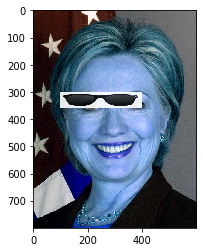

In [59]:
imshow(out)

In [12]:
s_img[:,:,:3].shape

(60, 300, 4)

In [15]:
x_offset=200
y_offset=700
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img[:,:,:3]

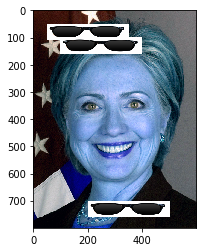

In [16]:
imshow(l_img)

In [13]:
show_img(s_img)

In [13]:
# Load two images
img1 = cv2.imread('../data/clinton.jpg')
img2 = cv2.imread('../data/mustache_png.png', cv2.IMREAD_UNCHANGED)

In [14]:
show_img(img1)

In [10]:
def combine_img():
    # Load two images
    img1 = cv2.imread('../data/clinton.jpg')
    img2 = cv2.imread('../data/moustache_png.png', cv2.IMREAD_UNCHANGED)

    # I want to put logo on top-left corner, So I create a ROI
    rows,cols,channels = img2.shape
    roi = img1[0:rows, 0:cols ]

    # Now create a mask of logo and create its inverse mask also
    img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # Now black-out the area of logo in ROI
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

    # Take only region of logo from logo image.
    img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

    # Put logo in ROI and modify the main image
    dst = cv2.add(img1_bg,img2_fg)
    img1[0:rows, 0:cols ] = dst

    cv2.imshow('res',img1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [42]:
arrays = np.random.randn(60, 100,3)
to_add = np.zeros((60,100,1))
new = np.append(arrays,to_add, axis=-1)

In [49]:
new[:,:,3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])